In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import platform
from datetime import datetime,timedelta
import numpy as np
from wordcloud import WordCloud
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px


# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'


# Warning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
warnings.simplefilter(action='ignore', category=UserWarning)  
pd.set_option('mode.chained_assignment',  None)   
#pd.set_option('mode.chained_assignment', 'warn')

In [3]:
# 판다스 출력 default 60 20
pd.options.display.max_rows = 60
pd.options.display.max_columns = 30

In [4]:
camping = pd.DataFrame()

years = ['2020','2021','2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
for year in years:
    try:
        for j in month:
            df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/{year}{j}.xlsx')
            df['date'] = year+j
            df = df[df['소분류 카테고리'] =='캠핑']
            camping = pd.concat([camping,df])
    except:
        pass
    
df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/201911.xlsx')
df['date'] = '201911'
df = df[df['소분류 카테고리'] =='캠핑']
camping = pd.concat([camping,df])

df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/201912.xlsx')
df['date'] = '201912'
df = df[df['소분류 카테고리'] =='캠핑']
camping = pd.concat([camping,df])

camping = camping.drop(labels=['순위','중분류 카테고리','소분류 카테고리'],axis=1).reset_index(drop=True)
camping.to_csv('datalab.csv')

In [5]:
camping = camping.sort_values(by='date').reset_index(drop=True)

In [6]:
   
cam_sp_2020 = camping[(camping['date'].astype(int) >= 202003) & (camping['date'].astype(int) <= 202005)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2020['year'] = '2020'
cam_sp_2020['sep'] = '1'
cam_sum_2020 = camping[(camping['date'].astype(int) >= 202006) & (camping['date'].astype(int) <= 202008)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2020['year'] = '2020'
cam_sum_2020['sep'] = '2'
cam_fal_2020 = camping[(camping['date'].astype(int) >= 202009) & (camping['date'].astype(int) <= 2020011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2020['year'] = '2020'
cam_fal_2020['sep'] = '3'
cam_win_2020 = camping[(camping['date'].astype(int) >= 202011) & (camping['date'].astype(int) <= 202101)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_win_2020['year'] = '2020'
cam_win_2020['sep'] = '4'
cam_2020 = pd.concat([cam_sp_2020,cam_sum_2020,cam_fal_2020,cam_win_2020])


In [7]:
   
cam_sp_2021 = camping[(camping['date'].astype(int) >= 202103) & (camping['date'].astype(int) <= 202105)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2021['year'] = '2021'
cam_sp_2021['sep'] = '1'
cam_sum_2021 = camping[(camping['date'].astype(int) >= 202106) & (camping['date'].astype(int) <= 202108)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2021['year'] = '2021'
cam_sum_2021['sep'] = '2'
cam_fal_2021 = camping[(camping['date'].astype(int) >= 202109) & (camping['date'].astype(int) <= 2021011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2021['year'] = '2021'
cam_fal_2021['sep'] = '3'
cam_win_2021 = camping[(camping['date'].astype(int) >= 202111) & (camping['date'].astype(int) <= 202201)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_win_2021['year'] = '2021'
cam_win_2021['sep'] = '4'
cam_2021 = pd.concat([cam_sp_2021,cam_sum_2021,cam_fal_2021,cam_win_2021])

In [8]:
cam_sp_2022 = camping[(camping['date'].astype(int) >= 202203) & (camping['date'].astype(int) <= 202205)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2022['year'] = '2022'
cam_sp_2022['sep'] = '1'
cam_sum_2022 = camping[(camping['date'].astype(int) >= 202206) & (camping['date'].astype(int) <= 202208)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2022['year'] = '2022'
cam_sum_2022['sep'] = '2'
cam_fal_2022 = camping[(camping['date'].astype(int) >= 202209) & (camping['date'].astype(int) <= 2022011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2022['year'] = '2022'
cam_fal_2022['sep'] = '3'

cam_2022 = pd.concat([cam_sp_2022,cam_sum_2022,cam_fal_2022])

In [9]:
cam_2020['year_sep'] = cam_2020['year']+cam_2020['sep']
cam_2021['year_sep'] = cam_2021['year']+cam_2021['sep']
cam_2022['year_sep'] = cam_2022['year']+cam_2022['sep']
cam_sep = pd.concat([cam_2020,cam_2021,cam_2022])

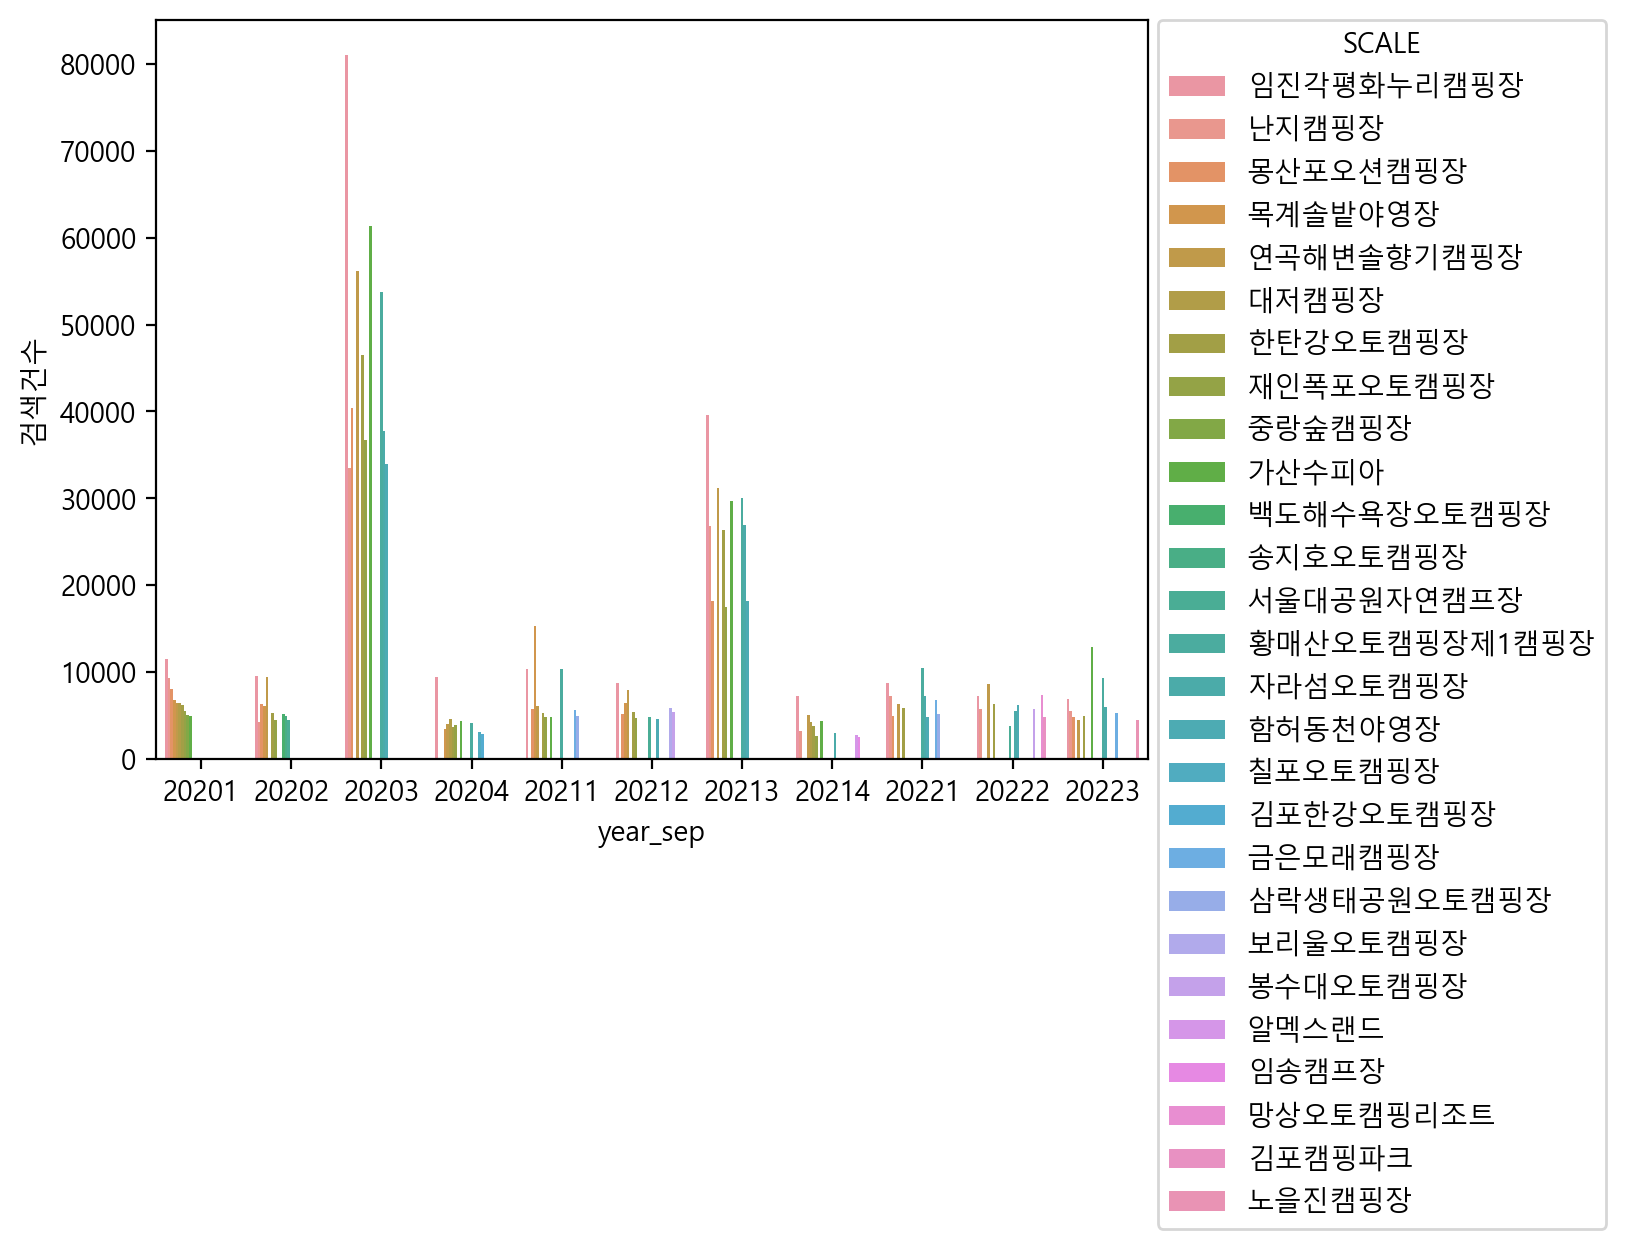

In [10]:
sns.barplot(data = cam_sep, x='year_sep',y='검색건수',hue='관광지명')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',title= 'SCALE', borderaxespad=0)

In [11]:
cam_sep.head(3)

,관광지명,검색건수,year,sep,year_sep
69,임진각평화누리캠핑장,11549,2020,1,20201
11,난지캠핑장,9307,2020,1,20201
28,몽산포오션캠핑장,8053,2020,1,20201


In [16]:
c_1 = cam_sep[cam_sep['sep']=='1'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_2 = cam_sep[cam_sep['sep']=='2'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_3 = cam_sep[cam_sep['sep']=='3'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_4 = cam_sep[cam_sep['sep']=='4'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))

In [21]:
ratio_total_1= list(c_1.loc[:,'검색건수'])
labels_total_1 = list(c_1.loc[:,'관광지명'])
ratio_total_2= list(c_2.loc[:,'검색건수'])
labels_total_2 = list(c_2.loc[:,'관광지명'])
ratio_total_3= list(c_3.loc[:,'검색건수'])
labels_total_3 = list(c_3.loc[:,'관광지명'])
ratio_total_4= list(c_4.loc[:,'검색건수'])
labels_total_4 = list(c_4.loc[:,'관광지명'])
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels_total_1, values=ratio_total_1)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()
fig = go.Figure(data=[go.Pie(labels=labels_total_2, values=ratio_total_2)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()
fig = go.Figure(data=[go.Pie(labels=labels_total_3, values=ratio_total_3)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()
fig = go.Figure(data=[go.Pie(labels=labels_total_4, values=ratio_total_4)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()